Data Fields

- split: Train, Test split
- message: English text of actual messages related to disaster
- original: Text of column 3 in native language as originally written
- genre: Type of message, including direct messages, social posting, and news stories or bulletins
- related: Is the message disaster related? 1= yes, 0=no, 2=maybe
- PII: Does the message contain PII? 1= yes, 0=no
- request: Does the message contain a request? 1= yes, 0=no
- offer: Does the message contain an offer? 1= yes, 0=no
- aid_related: Is the message aid related? 1= yes, 0=no
- medical_help: Does the message concern medical help? 1= yes, 0=no
- medical_products: Does the message concern medical products? 1= yes, 0=no
- search_and_rescue: Does the message concern search and rescue? 1= yes, 0=no
- security: Does the message concern security? 1= yes, 0=no
- military: Does the message concern military? 1= yes, 0=no
- child_alone: Does the message mention a child alone? 1= yes, 0=no
- water: Does the message concern water? 1= yes, 0=no
- food: Does the message concern food? 1= yes, 0=no
- shelter: Does the message concern shelter? 1= yes, 0=no
- clothing: Does the message concern clothing? 1= yes, 0=no
- money: Does the message concern money? 1= yes, 0=no
- missing_people: Does the message indicate missing people? 1= yes, 0=no
- refugees: Does the message concern refugess? 1= yes, 0=no
- death: Does the message imply death? 1= yes, 0=no
- other_aid: Is there any other aid needed? 1=yes, 0=no
- infrastructure_related: Does the message concern infrastructure? 1= yes, 0=no
- transport: Does the message concern transport? 1= yes, 0=no
- buildings: Does the message concern buildings? 1= yes, 0=no
- electricity: Does the message concern electricity? 1= yes, 0=no
- tools: Does the message concern tools? 1= yes, 0=no
- hospitals: Does the message concern clothing? 1= yes, 0=no
- shops: Does the message concern clothing? 1= yes, 0=no
- aid_centers:Does the message concern clothing? 1= yes, 0=no
- other_infrastructure:Does the message concern clothing? 1= yes, 0=no
- weather_related: Does the message concern weather? 1= yes, 0=no
- floods: Does the message indicate there was a flood? 1= yes, 0=no
- storm: Does the message indicate there was a storm? 1= yes, 0=no
- fire: Does the message indicate there was a fire? 1= yes, 0=no
- earthquake: Does the message indicate there was an earthquake? 1= yes, 0=no
- cold: Does the message indicate there was a cold? 1= yes, 0=no
- other_weather: Does the message indicate there was other weather issues? 1= yes, 0=no
- direct_report: Does the show a direct report? 1= yes, 0=no

***I. IMPORT DATA AND PREPARATION***

In [601]:
import pandas as pd

In [602]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [603]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [604]:
import re

In [605]:
%pip install torch

In [606]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [607]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [608]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [609]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [610]:
df=pd.read_csv("Medical_Severity_Dataset_2.csv")

In [622]:
# Split the data into training and test sets with a 70:30 split
df_train_test, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Split the training and test sets into training and validation sets with a 50:50 split
df_train, df_valid = train_test_split(df_train_test, test_size=0.5, random_state=42)


In [623]:
df_train.head()

,ID,Type,Message,Medical_severity
1451,19915,train,"Last May, the main Siberian river system burst...",0
1633,21902,train,Many indigenous people living in the forested ...,0
335,6649,test,HELP ME WITH MY 9 KIDS WE NEED TENTS FOOD WATE...,1
1758,23103,train,Health officials on a daily basis are visiting...,0
799,28494,train,"To date, thirteen samples have tested positive...",1


In [624]:
df_test.head()

,ID,Type,Message,Medical_severity
582,26621,train,The best outcome would have been to give the S...,0
1711,22692,train,Some have said governments have over-reacted t...,0
1052,15388,validation,Remember when your phone needed to be charged ...,0
1075,15999,test,The X-rays shown by doctors at the rehab centr...,1
917,29610,train,"High risk groups are pregnant women, children ...",1


In [625]:
df_valid.head()

,ID,Type,Message,Medical_severity
117,3121,train,yes we understand all the things the health mi...,0
430,9457,train,How we can help my camp? We need mobil clinica...,1
1460,20043,train,"The highly mobile medical team, which can be d...",0
504,25733,train,The project will also strengthen the managemen...,1
963,29995,train,Assistance in the form of food and agricultura...,0


In [626]:
df_train=df_train.applymap(str)
df_valid=df_valid.applymap(str)
df_valid=df_valid.applymap(str)

In [627]:
def join_words(words_list):
    return ' '.join(words_list)

In [628]:
#Set up stop words for removal
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords
stop_words=stopwords.words("english")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\buith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [616]:
list_of_stop_words=["the", "has", "it", "with", "were", "can", "of","to","on", "this", "about", "that","was", "also", "http", "are","is", "am","some", "about","a", "an", "which", "what", "how", "when", "who","this","that","are", "the", "to", "we", "have", "in", "you", "with", "of", "what", "be", "as", "has", "from", "by", "that", "am","people","know","dont","also","would","people","please","like","would","People","Know","need","Need","Also","Like","Would","Dont","take","make","tell","well","many","Many","want","Want","cause","still","since","give","year","include","problem","place","region","number","find","provide","come","can","could","may","might","area","affect","world","person","part","thank","thanks","haiti", "information", "good", "anything", "nothing", "time","help","country","report","can","cant","cannot","can not","along","didnt","never","anymore",'havent',"without","others","natural","response","disaster","sandy","food","continue","something","even","already","continue",'disaster',"much","last","year","month","week","already", "important", "concern", "morning", "haitian", "system", "leave", "friend", "mother", "back","lose","portauprince","assisstance","relief","risk","management","support","stay","livelihood","temporary","support","send","someone","somebody","portauprince","flood","water","hurricane","earthquake","storm","bitly","rain","never","anymore","without","sandy","food","response","something","even","didnt","much","especially","last","week","year","month","sent","send","receive","daily","inside","concern","already","temporary","government","message",'nothern','central','local','start','severly','bring','india','district','province','flooding','official','santiago',"will","help","need","cross","people","thank","still","said","last","help","people","u","will","information","several","anything","find","thank","want","area","said","including","assisstance","need","team","work","live","lives","note","notes",'from','to','as','of','are','such','and','from','to','are','with','include','including','among','general','though','as','of','which','are','or','with','though','namely','also','a','an','against','food','water','people','will','people','will','need','many','area','said','u','current','situation','operation',"hello",'really','trouble','bother','worry','info','please','we']
list_of_stop_words = list(set(list_of_stop_words))
stop_words.extend(list_of_stop_words)


In [617]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())
    x = re.sub(r'\b\w{1,3}\b',' ',x)
    x = re.sub(r'\d+',' ', x)
    stop_words = list(stopwords.words('english'))
    stop_words.extend(list_of_stop_words)
    x = [w for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [618]:
#mapping pos tags
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [619]:
#lemmatizing 
import string

def clean_text(text):
    text = [word.strip(string.punctuation) for word in text.split()]
    pos_tags = pos_tag(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = " ".join(text)
    return(text)

In [620]:
df_train=df_train.applymap(str)
df_test=df_test.applymap(str)
df_valid=df_valid.applymap(str)

In [629]:
df_train['message_cleaned']=df_train['Message'].apply(clean_text)
df_test['message_cleaned']=df_test['Message'].apply(clean_text)
df_valid['message_cleaned']=df_valid['Message'].apply(clean_text)

df_train['message_cleaned']=df_train['message_cleaned'].apply(preprocess)
df_test['message_cleaned']=df_test['message_cleaned'].apply(preprocess)
df_valid['message_cleaned']=df_valid['message_cleaned'].apply(preprocess)

II. FEATURE EXTRACTION

2.1 BAG-OR-WORDS

In [630]:
# Create a CountVectorizer object and fit it on the "message" column of the train dataframe
vectorizer_train = CountVectorizer()
train_bow = vectorizer_train.fit_transform(df_train['message_cleaned'])

# # Create a CountVectorizer object and fit it on the "message" column of the test dataframe
# vectorizer_test = CountVectorizer()
# test_bow = vectorizer_test.fit_transform(df_test['message_cleaned'])

# Create a CountVectorizer object and fit it on the "message" column of the valid dataframe
vectorizer_valid = CountVectorizer()
valid_bow = vectorizer_valid.fit_transform(df_valid['message_cleaned'])

# # Create a CountVectorizer object and fit it on the "message" column of the dataframe
# vectorizer_df = CountVectorizer()
# df_bow = vectorizer_df.fit_transform(df['message_cleaned'])

In [631]:
# Create a dictionary of word frequencies from the BoW matrix for train
bow_dict_train = dict(zip(vectorizer_train.get_feature_names_out(), train_bow.sum(axis=0).tolist()[0]))
# # Create a dictionary of word frequencies from the BoW matrix for test
# bow_dict_test = dict(zip(vectorizer_test.get_feature_names_out(), test_bow.sum(axis=0).tolist()[0]))

# Create a dictionary of word frequencies from the BoW matrix for valid
bow_dict_valid = dict(zip(vectorizer_valid.get_feature_names_out(), valid_bow.sum(axis=0).tolist()[0]))

# # Create a dictionary of word frequencies from the BoW matrix for df
# bow_dict_df = dict(zip(vectorizer_df.get_feature_names_out(), df_bow.sum(axis=0).tolist()[0]))

2.2 Word Cloud

In [632]:
# Import wordcloud
from wordcloud import WordCloud

In [633]:
import matplotlib.pyplot as plt

In [634]:
# Create a word cloud
wordcloud_train = WordCloud(background_color="white").generate_from_frequencies(bow_dict_train)
# wordcloud_test = WordCloud(background_color="white").generate_from_frequencies(bow_dict_test)
wordcloud_valid = WordCloud(background_color="white").generate_from_frequencies(bow_dict_valid)
# wordcloud_df = WordCloud(background_color="white").generate_from_frequencies(bow_dict_df)

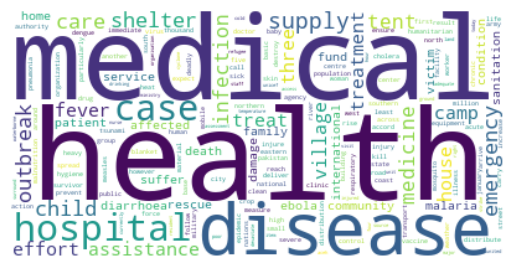

None

In [635]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
display(plt.show())

In [636]:
# # Test word_cloud
# plt.imshow(wordcloud_test, interpolation='bilinear')
# plt.axis("off")
# plt.show()

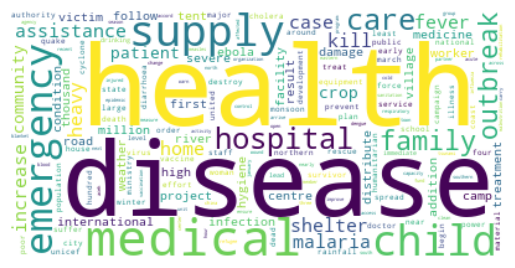

In [637]:
# Valid word_cloud
plt.imshow(wordcloud_valid, interpolation='bilinear')
plt.axis("off")
plt.show()

2.3 TF-IDF

In [638]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# # Create a TfidfVectorizer object and fit it on the "message" column of the dataframe
# tfidf_df_test = TfidfVectorizer(max_features=30)
# tfidf_df_test_matrix = tfidf_df_test.fit_transform(df_test['message_cleaned'])

# # Create a DataFrame from the TF-IDF matrix
# tfidf_df_test_matrix=pd.DataFrame(tfidf_df_test_matrix.toarray(), columns=tfidf_df_test.get_feature_names_out())
# tfidf_df_test_matrix.fillna(value="", inplace=True)

In [639]:
# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe
tfidf_df_train = TfidfVectorizer(max_features=30)
tfidf_df_train_matrix = tfidf_df_train.fit_transform(df_train['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_train_matrix=pd.DataFrame(tfidf_df_train_matrix.toarray(), columns=tfidf_df_train.get_feature_names_out())
tfidf_df_train_matrix.fillna(value="", inplace=True)

In [640]:
# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe
tfidf_df_valid = TfidfVectorizer(max_features=30)
tfidf_df_valid_matrix = tfidf_df_valid.fit_transform(df_valid['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_valid_matrix=pd.DataFrame(tfidf_df_valid_matrix.toarray(), columns=tfidf_df_valid.get_feature_names_out())
tfidf_df_valid_matrix.fillna(value="", inplace=True)

In [641]:
# # Create a TfidfVectorizer object and fit it on the "message" column of the dataframe
# tfidf_df = TfidfVectorizer(max_features=30)
# tfidf_df_matrix = tfidf_df.fit_transform(df['message_cleaned'])

# # Create a DataFrame from the TF-IDF matrix
# tfidf_df_matrix=pd.DataFrame(tfidf_df_matrix.toarray(), columns=tfidf_df.get_feature_names_out())
# tfidf_df_matrix.fillna(value="", inplace=True)

In [642]:
# tfidf_df_test_matrix.head()

In [643]:
tfidf_df_train_matrix.head()

,affected,assistance,camp,care,case,child,community,diarrhoea,disease,effort,...,patient,shelter,suffer,supply,tent,three,treat,treatment,victim,village
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.555479,0.0,0.0,0.0,0.0,0.0,0.526271,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [644]:
tfidf_df_valid_matrix.head()

,assistance,care,case,child,community,crop,disease,ebola,emergency,family,...,malaria,medical,medicine,million,outbreak,patient,shelter,supply,tent,village
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.718072,0.0,0.695969,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.593604,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.518082,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.519853,0.000000,0.0,0.000000,0.0,0.0,0.391153,0.0,0.0,0.0,...,0.53497,0.000000,0.0,0.0,0.0,0.0,0.539036,0.0,0.0,0.0


In [645]:
# tfidf_df_matrix.head()

In [646]:
# feature_df_names=list(tfidf_df.get_feature_names_out())
# feature_train_names=list(tfidf_df_train.get_feature_names_out())
# feature_test_names=list(tfidf_df_test.get_feature_names_out())
# feature_valid_names=list(tfidf_df_valid.get_feature_names_out())

In [647]:
# Extract the top N keywords for each document
N = 3
top_keywords_per_doc_train = []
for row in tfidf_df_train_matrix:
    doc_keywords_train = sorted(list(zip(tfidf_df_train.get_feature_names_out(), row)), key=lambda x: x[1], reverse=True)[:N]
    top_keywords_per_doc_train.append([k for k, v in doc_keywords_train])

# Print the keywords for each document
for i, keywords in enumerate(top_keywords_per_doc_train):
    print("Document {}: {}".format(i+1, ", ".join(keywords)))


Document 1: child, assistance, camp
Document 2: child, assistance, camp
Document 3: care, camp, affected
Document 4: camp, care, affected
Document 5: camp, care, affected
Document 6: care, camp, assistance
Document 7: disease, case, diarrhoea
Document 8: care, case, community
Document 9: camp, child, assistance
Document 10: child, case, care
Document 11: disease, care, community
Document 12: camp, case, affected
Document 13: case, care, affected
Document 14: child, camp, care
Document 15: camp, care, assistance
Document 16: child, diarrhoea, assistance
Document 17: case, affected, camp
Document 18: affected, community, care
Document 19: community, affected, care
Document 20: assistance, camp, case
Document 21: camp, community, affected
Document 22: case, affected, community
Document 23: assistance, affected, child
Document 24: child, assistance, affected
Document 25: affected, care, camp
Document 26: affected, camp, assistance
Document 27: affected, case, assistance
Document 28: affect

In [648]:
# # Extract the top N keywords for each document
# N = 3
# top_keywords_per_doc_test = []
# for row in tfidf_df_test_matrix:
#     doc_keywords_test = sorted(list(zip(tfidf_df_test.get_feature_names_out(), row)), key=lambda x: x[1], reverse=True)[:N]
#     top_keywords_per_doc_test.append([k for k, v in doc_keywords_test])

# # Print the keywords for each document
# for i, keywords in enumerate(top_keywords_per_doc_test):
#     print("Document {}: {}".format(i+1, ", ".join(keywords)))


In [649]:
# Extract the top N keywords for each document
N = 3
top_keywords_per_doc_valid = []
for row in tfidf_df_valid_matrix:
    doc_keywords_valid = sorted(list(zip(tfidf_df_valid.get_feature_names_out(), row)), key=lambda x: x[1], reverse=True)[:N]
    top_keywords_per_doc_valid.append([k for k, v in doc_keywords_valid])

# Print the keywords for each document
for i, keywords in enumerate(top_keywords_per_doc_valid):
    print("Document {}: {}".format(i+1, ", ".join(keywords)))


Document 1: crop, care, case
Document 2: case, child, assistance
Document 3: case, child, assistance
Document 4: child, case, care
Document 5: emergency, community, ebola
Document 6: care, child, case
Document 7: case, crop, care
Document 8: case, child, assistance
Document 9: emergency, child, disease
Document 10: crop, case, community
Document 11: case, community, assistance
Document 12: crop, care, community
Document 13: community, child, assistance
Document 14: community, child, assistance
Document 15: care, case, assistance
Document 16: crop, case, child
Document 17: disease, child, care
Document 18: crop, ebola, care
Document 19: case, ebola, community
Document 20: case, child, assistance
Document 21: community, assistance, case
Document 22: assistance, disease, child
Document 23: disease, assistance, child
Document 24: crop, disease, assistance
Document 25: care, case, community
Document 26: case, disease, assistance
Document 27: community, assistance, disease
Document 28: crop,

In [650]:
tfidf_df_train_matrix

,affected,assistance,camp,care,case,child,community,diarrhoea,disease,effort,...,patient,shelter,suffer,supply,tent,three,treat,treatment,victim,village
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.555479,0.0,0.0,0.000000,0.000000,0.0,0.526271,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
690,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.707107,0.0,0.0
691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
692,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.508732,0.535378,0.0,0.000000,0.000000,0.0,0.0


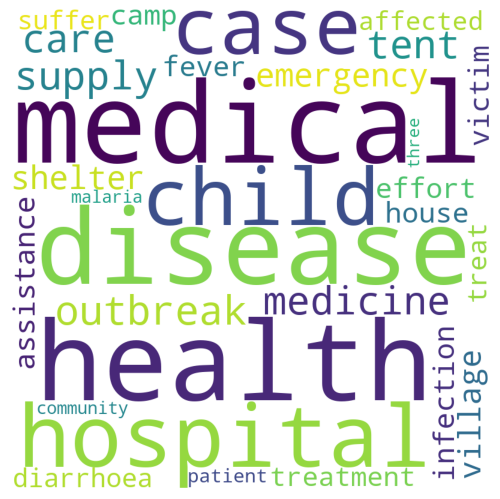

In [651]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_train_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

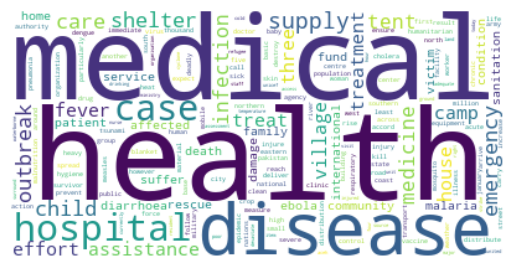

None

In [652]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
display(plt.show())

In [653]:
# # create a wordcloud
# wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_test_matrix.sum(axis=0))
# # plt.figure(figsize=(8, 8), facecolor=None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

In [654]:
# # Train word_cloud
# plt.imshow(wordcloud_test, interpolation='bilinear')
# plt.axis("off")
# display(plt.show())

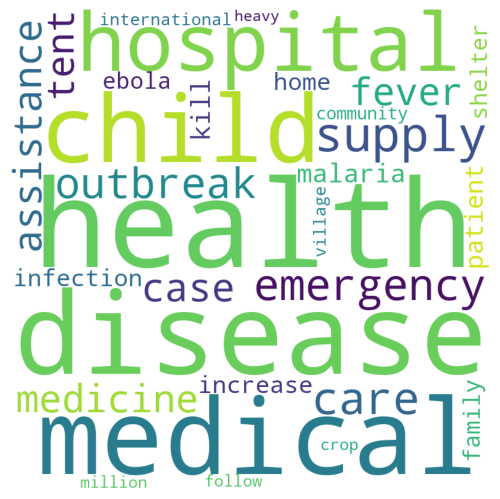

In [655]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_valid_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

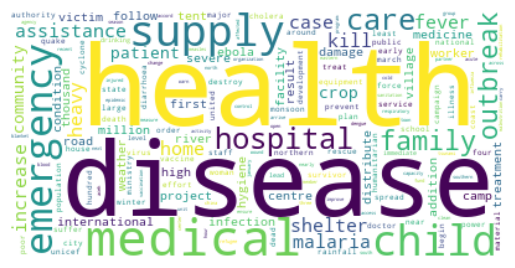

None

In [656]:
# Train word_cloud
plt.imshow(wordcloud_valid, interpolation='bilinear')
plt.axis("off")
display(plt.show())

***III. Machine learning***

***1. Prepare data***

In [657]:
import sklearn
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer 

# Create an empty array
X = np.array([], dtype=str) 
# Append text from all the splits to the empty array
X = np.append(X, df_train["message_cleaned"]) 
X = np.append(X, df_valid["message_cleaned"])
# X = np.append(X, df_test["message_cleaned"])

vectorizer = TfidfVectorizer() # Load the tf-idf vectorizer from sklearn
vectorizer = vectorizer.fit(X) # Fit the vectorizer on the entire data

In [658]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 6774


In [659]:

# Append text from all the splits to the empty array
X_train = vectorizer.transform(df_train["message_cleaned"]).toarray()
# X_test = vectorizer.transform(df_test["message_cleaned"]).toarray()
X_valid = vectorizer.transform(df_valid["message_cleaned"]).toarray()

In [660]:

vectorizer = TfidfVectorizer() # Load the tf-idf vectorizer from sklearn
vectorizer = vectorizer.fit(X) # Fit the vectorizer on the entire data

In [661]:
# Extract the vocabulary from the vectorizer
vocab = vectorizer.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 6774


In [662]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
main => 3517
siberian => 5453
river => 5112
burst => 762
bank => 475


In [663]:
# Transform the text for each data split and store it in a variable
X_train = vectorizer.transform(df_train["message_cleaned"]).toarray()
X_val= vectorizer.transform(df_valid["message_cleaned"]).toarray()
# X_test = vectorizer.transform(df_test["message_cleaned"]).toarray()

In [664]:
y_train = df_train["Medical_severity"].to_numpy()
y_val = df_valid["Medical_severity"].to_numpy()
# y_test = df_test["Medical_severity"].to_numpy()

In [665]:
# df_test["Medical_severity"].value_counts()

***2. Logistic regression***

In [666]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 

import matplotlib.pyplot as plt

In [667]:
# Load the model
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = lr_model.predict(X_val)

# convert '0' and '1' to 0 and 1
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 61.01 %
Weighted Avg F1-score = 0.4956


In [668]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_val, pred_val, pos_label=1)
recall = recall_score(y_val, pred_val, pos_label=1)
f1 = f1_score(y_val, pred_val, pos_label=1)

print("Precision: "+str(precision))
print("Recall: "+str(recall))
print("F1: "+str(f1))


Precision: 0.7777777777777778
Recall: 0.07342657342657342
F1: 0.134185303514377


In [670]:
y_scores = lr_model.predict_proba(X_val)[:, 1] # Probability of the positive class

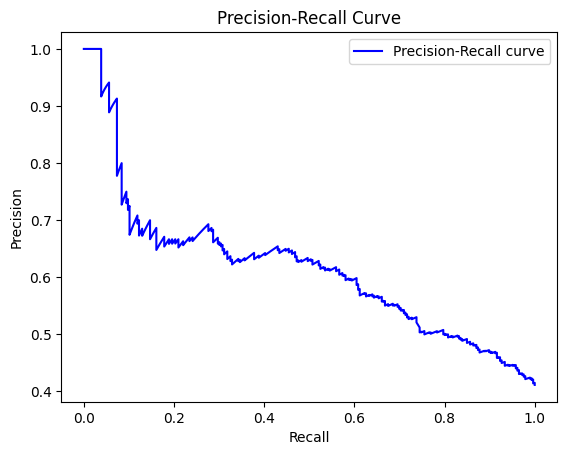

In [671]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

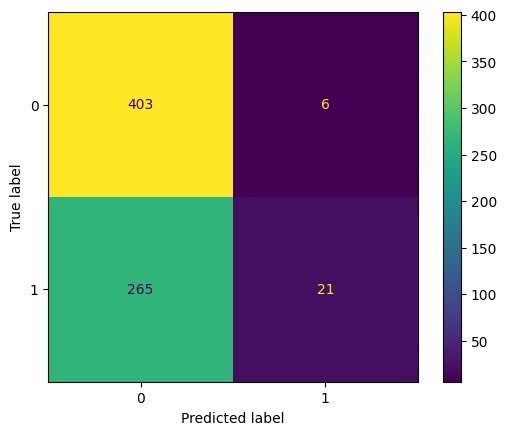

In [672]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

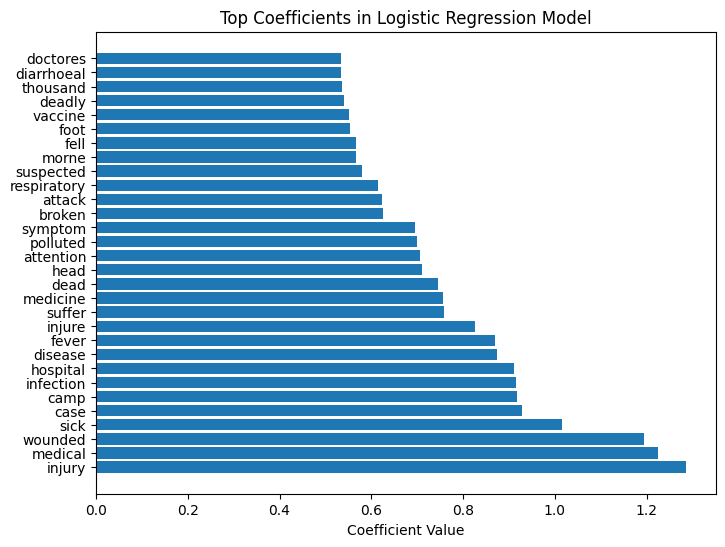

In [673]:
import matplotlib.pyplot as plt

# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Obtain the coefficients of the logistic regression model
coefficients = lr_model.coef_[0]

# Sort the coefficients in descending order
sorted_coefficients = sorted(zip(coefficients, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_coefficients = sorted_coefficients[:k]
top_features = [feature for coef, feature in top_coefficients]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_coefficients])
ax.set_title("Top Coefficients in Logistic Regression Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [674]:
top_coefficients

[(1.2869174110954629, 'injury'),
 (1.2240543615124524, 'medical'),
 (1.1938064175595466, 'wounded'),
 (1.0147419954560228, 'sick'),
 (0.9279073006363903, 'case'),
 (0.9167405917555752, 'camp'),
 (0.9144618798760926, 'infection'),
 (0.9114739212163526, 'hospital'),
 (0.8746527311516268, 'disease'),
 (0.869944237347232, 'fever'),
 (0.8259326951694163, 'injure'),
 (0.7587903811098361, 'suffer'),
 (0.7560179757438739, 'medicine'),
 (0.7450809408155729, 'dead'),
 (0.7101582043027302, 'head'),
 (0.7058727807871393, 'attention'),
 (0.6993956601595323, 'polluted'),
 (0.6958566943719605, 'symptom'),
 (0.625580533401635, 'broken'),
 (0.6235476486368238, 'attack'),
 (0.6138739851794115, 'respiratory'),
 (0.5800179175278658, 'suspected'),
 (0.5674960018754677, 'morne'),
 (0.5661852059927445, 'fell'),
 (0.5535141010652957, 'foot'),
 (0.5517939768983012, 'vaccine'),
 (0.5401281990380596, 'deadly'),
 (0.5357276749437947, 'thousand'),
 (0.5345881151454733, 'diarrhoeal'),
 (0.5339909323092401, 'doctore

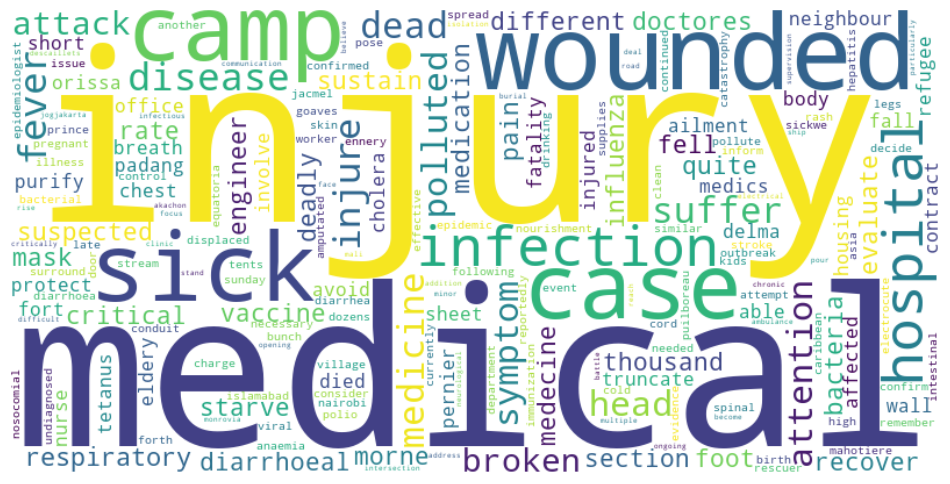

In [675]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the coefficients from the logistic regression model
coefficients = lr_model.coef_[0]

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Combine the coefficients and feature names into a dictionary
word_scores = dict(zip(feature_names, coefficients))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_scores)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

***3. Random Forest***

In [676]:
from xgboost import XGBClassifier

In [677]:
from sklearn.model_selection import train_test_split # package training and test data spilt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # package for random classifier
from sklearn.pipeline import make_pipeline # package for pipeline

In [678]:
model = RandomForestClassifier() # assign random classifier (black box) as a prediction model
model.fit(X_train, y_train) # fit the training and test data into the prediction model

RandomForestClassifier()

In [679]:
# Obtain the predictions for the validation data
rf_pred_val = model.predict(X_val)

In [680]:

# convert '0' and '1' to 0 and 1
rf_pred_val = [int(label) for label in rf_pred_val]

In [681]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice

results = classification_report(y_true=y_val, y_pred=rf_pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 62.73 %
Weighted Avg F1-score = 0.5511


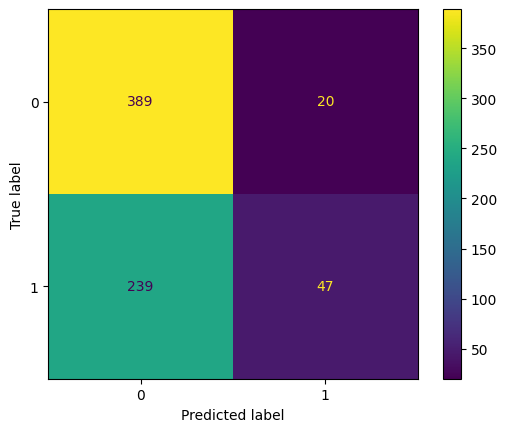

In [682]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, rf_pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [683]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


print(classification_report(y_val, rf_pred_val))


              precision    recall  f1-score   support

           0       0.62      0.95      0.75       409
           1       0.70      0.16      0.27       286

    accuracy                           0.63       695
   macro avg       0.66      0.56      0.51       695
weighted avg       0.65      0.63      0.55       695



In [684]:
y_scores = model.predict_proba(X_val)[:, 1] # Probability of the positive class

In [685]:
# convert '0' and '1' to 0 and 1
y_val = [int(label) for label in y_val]


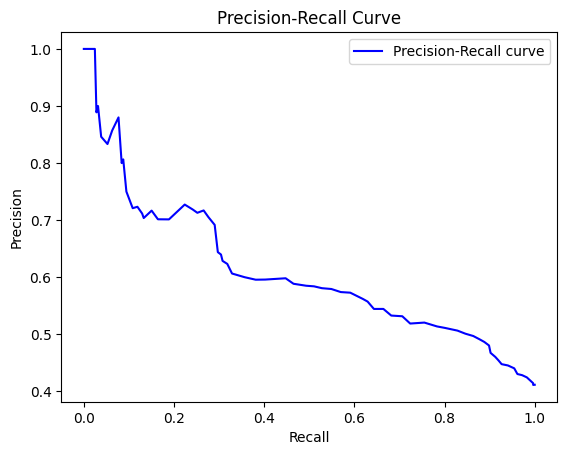

In [686]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

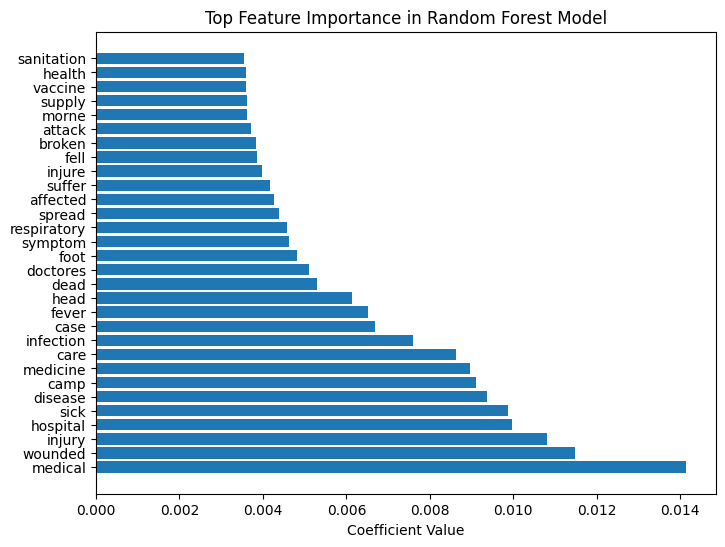

In [687]:
# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Generate feature importance plot
importances = model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Random Forest Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [688]:
top_importances

[(0.014148371571644114, 'medical'),
 (0.011466033107966485, 'wounded'),
 (0.010818143455133922, 'injury'),
 (0.009967692913312808, 'hospital'),
 (0.009881091863578701, 'sick'),
 (0.009379643999666875, 'disease'),
 (0.00910332641323771, 'camp'),
 (0.008967393365514274, 'medicine'),
 (0.008629209457711501, 'care'),
 (0.007595911970066895, 'infection'),
 (0.0066879979523061725, 'case'),
 (0.006507618044458676, 'fever'),
 (0.006146550837547133, 'head'),
 (0.005300540947509099, 'dead'),
 (0.005108639300010068, 'doctores'),
 (0.0048062980200912165, 'foot'),
 (0.004628372097132177, 'symptom'),
 (0.004585259581978346, 'respiratory'),
 (0.004382820601696268, 'spread'),
 (0.0042734527593365264, 'affected'),
 (0.00415803224800847, 'suffer'),
 (0.0039783239372726655, 'injure'),
 (0.0038561981160344623, 'fell'),
 (0.0038451483822870658, 'broken'),
 (0.003715787289540836, 'attack'),
 (0.0036266138364660634, 'morne'),
 (0.0036261659179565838, 'supply'),
 (0.0035897508022407006, 'vaccine'),
 (0.003587

In [689]:
words = [pair[1] for pair in top_importances]

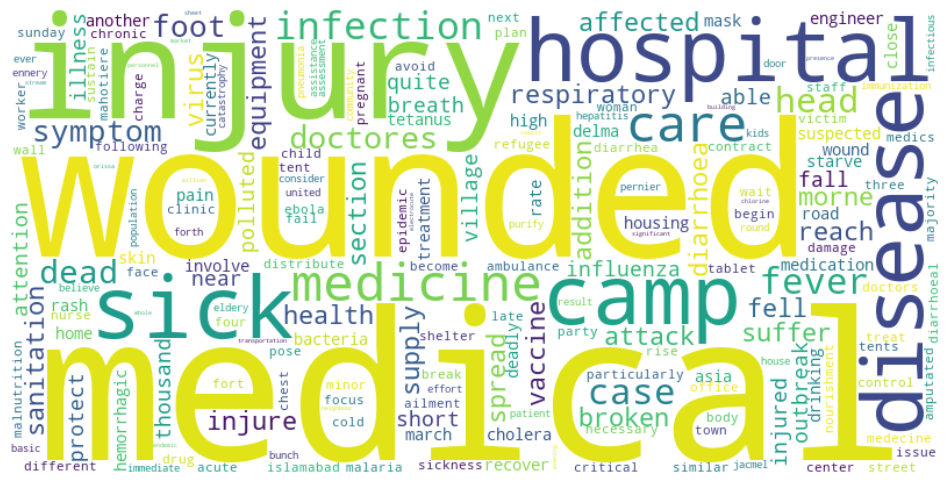

In [690]:
# Generate feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Based on the feature importance values you provided, we can see that "disease" and "medicine" are the two most important features for determining if the text relates to medical. Therefore, we can increase the weights of the terms "cancer" and "heart disease" to reflect their importance

***4. Decision Tree***

In [691]:
# Import the necessary libraries

from sklearn.tree import DecisionTreeClassifier # Decision Tree Model for Classification

In [692]:
# Load the model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = dt_model.predict(X_val)

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
y_pred = [int(label) for label in pred_val]
results = classification_report(y_true=y_val, y_pred=y_pred, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

Accuracy = 65.47 %
Weighted Avg F1-score = 0.6481


In [693]:
pred_val=np.array([int(x) for x in pred_val])

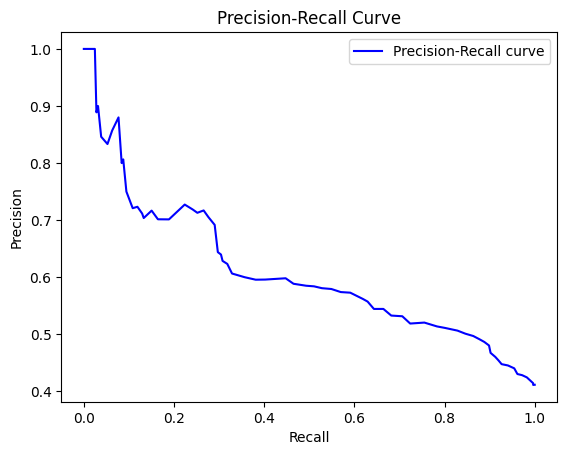

In [694]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

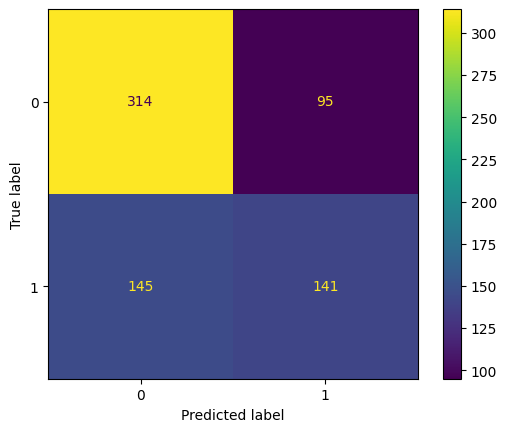

In [695]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

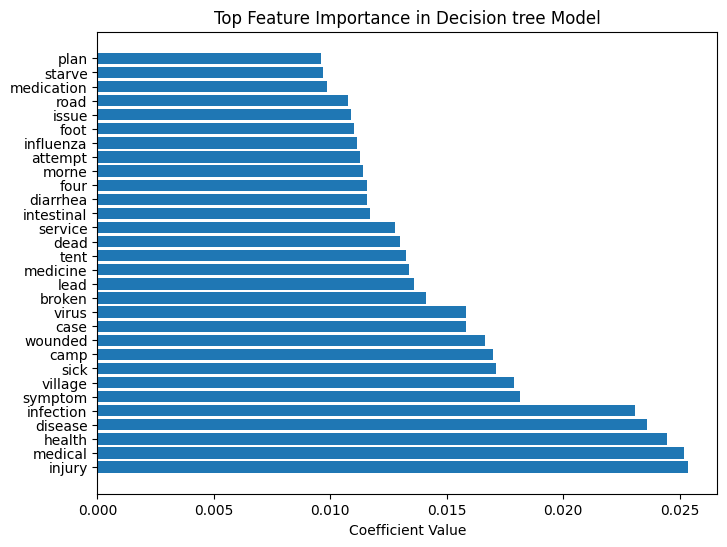

In [696]:
# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Generate feature importance plot
importances = dt_model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Decision tree Model")
ax.set_xlabel("Coefficient Value")
plt.show()

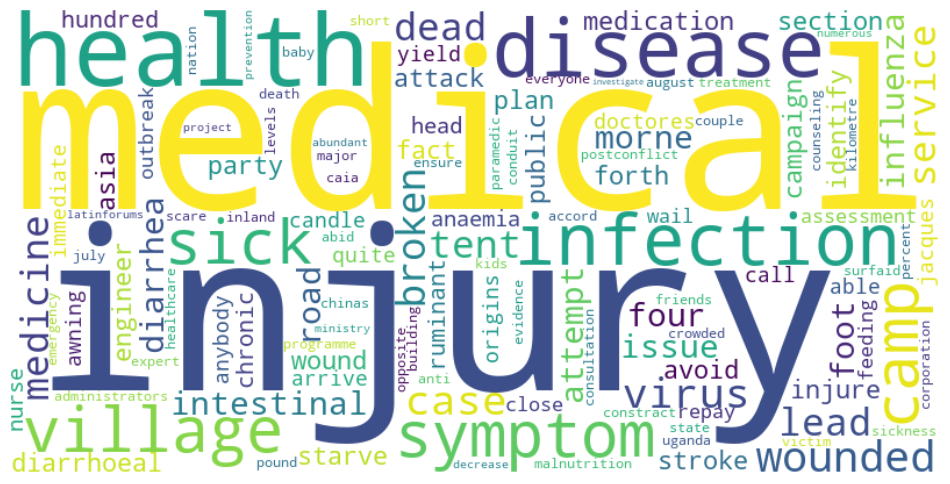

In [697]:
# Generate feature importance plot
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()